In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sn
import sklearn

# Analiza zbioru danych New York Times

Zbiór danych o rozmiarze 101 × 4433 zawierający 101 wektorów cech
reprezentujących artykuły New York Times w dwóch kategoriach: muzyka
i sztuka. Wektory cech są znormalizowanymi i przeskalowanymi zgodnie
z rankingiem IDF wektorami BoW. Rozmiar słownika wynosi 4433.

In [2]:
df = pd.read_csv("./nyt-frame.csv", header = 0)
data = df.iloc[:,9:]
array = data.values

In [3]:
df.head()

,Unnamed: 0,class.labels,X.,X.d,X.nd,X.s,X.th,X.this,a,abandoned,...,yorkers,yorks,you,young,younger,your,youre,youth,youthful,yu
0,1,art,0.008707,0.0,0.0,0.000000,0.009251,0.0,0.007564,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,art,0.005848,0.0,0.0,0.000000,0.000000,0.0,0.001418,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,art,0.016036,0.0,0.0,0.011403,0.000000,0.0,0.010063,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,art,0.026415,0.0,0.0,0.000000,0.000000,0.0,0.008677,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,art,0.007285,0.0,0.0,0.011008,0.000000,0.0,0.008390,0.0,...,0.0,0.0,0.048151,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
header = list(df.columns.values[9:])
sample_word = np.random.choice(header, 20, replace=False)
print(sample_word)


['paints' 'dresses' 'lived' 'here' 'greater' 'decorative' 'psychedelic'
 'similarly' 'nick' 'preservation' 'out' 'made' 'esthetic' 'hotel'
 'stories' 'crane' 'minimalist' 'mentions' 'commercial' 'fingers']


In [5]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(array)

In [6]:
pca.components_

array([[-3.10049805e-03, -9.13916060e-04,  1.58037921e-02, ...,
        -9.87858999e-04,  7.21067774e-03, -5.79701650e-03],
       [-8.58988095e-03,  8.30567814e-03,  1.18627563e-03, ...,
         5.56094686e-03, -6.79602772e-03, -6.33814027e-03],
       [-3.82898146e-03,  1.17211677e-02,  3.30233219e-04, ...,
        -2.59790784e-03, -4.65884349e-03, -7.89139868e-03],
       ...,
       [ 2.42050150e-03, -2.24054696e-02, -1.04534818e-02, ...,
         6.88405913e-03,  4.12041029e-03, -6.57600995e-03],
       [-6.27567287e-05, -5.29688312e-03,  3.93273613e-02, ...,
         8.25576708e-03, -2.57597285e-03,  5.84179075e-03],
       [ 9.85844228e-02, -1.67818081e-01,  2.34534316e-01, ...,
        -2.10237045e-03, -1.68921768e-04,  2.02007487e-04]])

In [7]:
df_pca = pd.DataFrame(pca.components_, columns=header)

pc1 = df_pca.iloc[0]
pc2 = df_pca.iloc[1]

## 15 elementów pierwszego komponentu wiodącego o największej wartości

In [8]:
pc1.sort_values(ascending=False)[:15]

she          0.261274
her          0.245293
ms           0.202113
i            0.150283
said         0.133606
mother       0.106872
cooper       0.103009
my           0.094325
painting     0.087887
process      0.071196
paintings    0.069885
im           0.068574
mrs          0.065621
he           0.065310
me           0.063793
Name: 0, dtype: float64

## 15 elementów pierwszego komponentu wiodącego o najmniejszej wartości

In [9]:
pc1.sort_values(ascending=True)[:15]

music       -0.112116
trio        -0.087807
theater     -0.074046
orchestra   -0.069269
composers   -0.058591
opera       -0.055554
theaters    -0.051178
m           -0.049025
program     -0.049001
players     -0.048819
festival    -0.048123
east        -0.047941
y           -0.047912
jersey      -0.046032
symphony    -0.044931
Name: 0, dtype: float64

Największe wartości występują przy słowach dotyczących sztuki oraz zaimków osobowych, które mozna traktować jako pewne zaszumienie. Najmniejsze wartości występują natomiast dla słów związanych z muzycznymi wydarzeniami.

## 15 elementów drugiego komponentu wiodącego o najmniejszej wartości

In [10]:
pc2.sort_values(ascending=False)[:15]

her           0.220785
she           0.213074
theater       0.162391
opera         0.129926
ms            0.124470
i             0.081202
hour          0.080759
sang          0.074653
production    0.074158
festival      0.073009
music         0.072345
musical       0.070708
songs         0.069232
orchestra     0.067603
vocal         0.067588
Name: 1, dtype: float64

## 15 elementów drugiego komponentu wiodącego o największej wartości

In [11]:
pc2.sort_values(ascending=True)[:15]

art          -0.154317
museum       -0.120899
images       -0.095227
artists      -0.092635
donations    -0.077658
museums      -0.075395
painting     -0.074020
tax          -0.072269
paintings    -0.065643
sculpture    -0.060353
gallery      -0.055159
sculptures   -0.051479
painted      -0.050138
white        -0.049667
service      -0.046664
Name: 1, dtype: float64

Dla drugiego komponentu zalezność jest odwrotna. Największe wartości występują dla słów związanych z muzyką, a najmniejsze dla tych powiązanych ze sztuką.

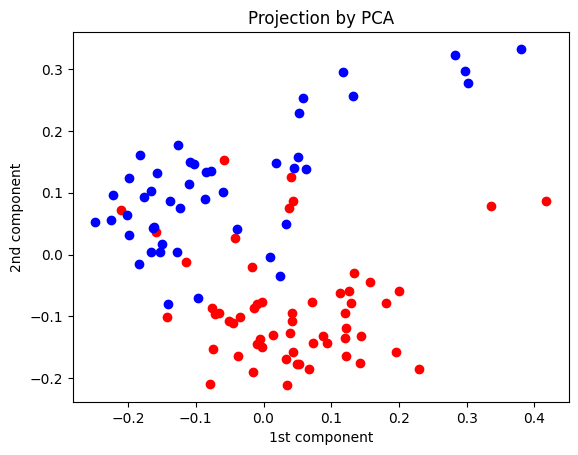

In [12]:
import matplotlib.pyplot as plt

reds = df['class.labels'] == 'art'
blues = df['class.labels'] == 'music'

plt.figure()
plt.scatter(X_pca[np.array(reds), 0], X_pca[np.array(reds), 1], c="red")
plt.scatter(X_pca[np.array(blues), 0], X_pca[np.array(blues), 1], c="blue")
plt.title("Projection by PCA")
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.show()

Wizualizacja pokazuje dobrą separację semantyczną klas.

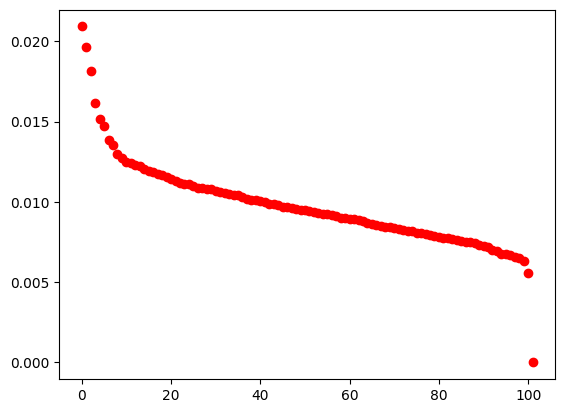

In [13]:
variance_ratio = pca.explained_variance_ratio_
plt.plot(variance_ratio, 'ro')
plt.show()

Część wyjaśnionej (zachowanej) wariancji przez pierwsze 10 komponentów wiodących:

In [14]:
print(sum(variance_ratio[0:10]))

0.15773478029003485


Wyjaśniony współczynnik wariancji (explained variance ratio) dla każdego głównego składnika w analizie głównych składowych (PCA) jest równy stosunkowi wartości własnej tego składnika do sumy wszystkich wartości własnych. To pozwala określić, jak dużo informacji o danych przechwytuje dany składnik.

# Analiza zbioru danych 04Cars

Zbiór danych o rozmiarze 387 × 20 zawierający 386 wektorów cech reprezentujących własności samochodów produkowanych w roku 2004. Pierwsza kolumna zawiera model samochodu, 8 kolejnych kolumn - dane binarne opisujące typ samochodu, następne 11 kolumn dane numeryczne np.
moc lub liczba cylindrów.

In [15]:
data_cars_full  = pd.read_csv("./04cars-data.csv", header=0)

In [16]:
attributes =list(data_cars_full.columns.values[-11:])

In [17]:
data_cars = data_cars_full.iloc[:, -11:]

In [18]:
data_cars.head(5)

,Retail Price,Dealer Cost,Engine Size (l),Cyl,HP,City MPG,Hwy MPG,Weight,Wheel Base,Len,Width
0,43755,39014,3.5,6,225,18,24,3880,115,197,72
1,46100,41100,3.5,6,225,18,24,3893,115,197,72
2,36945,33337,3.5,6,265,17,23,4451,106,189,77
3,89765,79978,3.2,6,290,17,24,3153,100,174,71
4,23820,21761,2.0,4,200,24,31,2778,101,172,68


Normalizowanie danych w celu zapewnienia średniej arytmetycznej równej 0 i wariancji równej 1.

In [19]:
from sklearn import preprocessing

In [20]:
data_cars_normalized = preprocessing.scale(data_cars)
print(data_cars_normalized)

[[ 0.5342275   0.47954631  0.36782701 ...  1.10042148  0.91058658
   0.21507724]
 [ 0.65326826  0.59622579  0.36782701 ...  1.10042148  0.91058658
   0.21507724]
 [ 0.18852702  0.16200584  0.36782701 ... -0.17123347  0.30548333
   1.70141457]
 ...
 [-0.36022806 -0.32440105 -1.21163543 ... -0.87770844 -0.37525783
  -0.97399263]
 [ 0.09715245  0.14942056 -0.61933701 ...  0.25265151  0.07856961
   0.5123447 ]
 [ 0.40706455  0.47042898 -0.22447141 ...  0.81783149  0.30548333
   1.10687963]]


In [21]:
data_cars_normalized.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [22]:
data_cars_normalized.mean(axis=0)

array([-4.13106242e-17,  4.13106242e-17, -6.05889155e-16, -1.00981526e-16,
       -1.79012705e-16, -4.59006935e-18, -7.57361443e-17, -2.06553121e-16,
        7.89491929e-16, -6.70150125e-16,  1.78094691e-15])

In [23]:
pca = PCA()
X_pca = pca.fit_transform(data_cars_normalized)

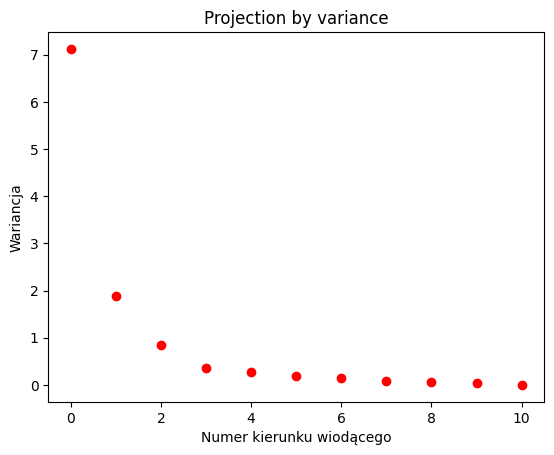

In [24]:
variance = pca.explained_variance_
plt.title("Projection by variance")
plt.plot(variance, 'ro')
plt.xlabel("Numer kierunku wiodącego")
plt.ylabel("Wariancja")
plt.show()

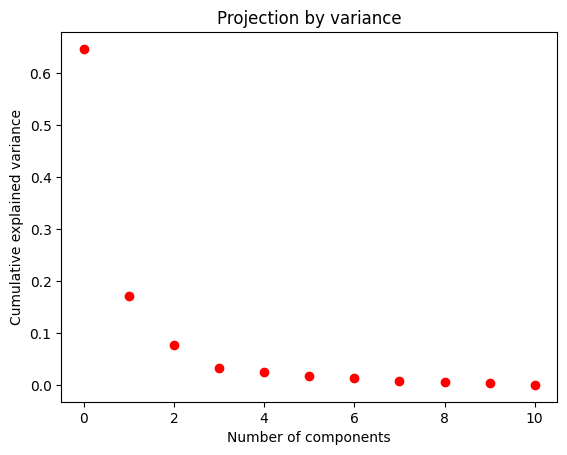

In [25]:
variance_ratio = pca.explained_variance_ratio_
plt.title("Projection by variance")
plt.plot(variance_ratio, 'ro')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [26]:
explained_variance_first_2 = np.sum(variance_ratio[:2])
explained_variance_first_3 = np.sum(variance_ratio[:3])

print("Suma zachowanej wariancji dla pierwszych 2 komponentów:", explained_variance_first_2)
print("Suma zachowanej wariancji dla pierwszych 3 komponentów:", explained_variance_first_3)

Suma zachowanej wariancji dla pierwszych 2 komponentów: 0.8171421089701892
Suma zachowanej wariancji dla pierwszych 3 komponentów: 0.894390134894234


Niestety bardzo duża część wariancji zostaje utracona przy takiej redukcji wymiarowości

In [27]:
pc1 = pca.components_[0]
pc2 = pca.components_[1]

print('Attribute, PC1, PC2')
for i in range(0, pc1.shape[0]):
    print(attributes[i] + ':' + repr(pc1[i]) + ':' + repr(pc2[i]))

Attribute, PC1, PC2
Retail Price:-0.26375044344403437:0.46850869750253865
Dealer Cost:-0.26231863875309536:0.4701465851382258
Engine Size (l):-0.34708049202520097:-0.015347186463713802
Cyl:-0.3341887576286371:0.07803201087501868
HP:-0.3186022584840293:0.2922134761391821
City MPG:0.3104817267323128:-0.003365935761659042
Hwy MPG:0.3065886385804444:-0.010964460145348603
Weight:-0.3363293669404879:-0.16746357154787045
Wheel Base:-0.2662100335710542:-0.4181771069592043
Len:-0.2567901876706821:-0.4084113806687545
Width:-0.29605459141706103:-0.31289135016250713


Wartości bliskie zeru mają mniejsze znaczenie dla klasyfikacji, nie klastrują się dobrze.

Powiązane własności samochodów z:
- Największymi elementami pierwszego komponentu wiodącego:
      City MPG, Hwy MPG
- Najmniejszymi elementami pierwszego komponentu wiodącego:
      Weight,Engine Size
- Największymi elementami drugiego komponentu wiodącego:
      Dealer Cost, Retail Price
- Najmniejszymi elementami drugiego komponentu wiodącego:
      Wheel Base, Len
      
      
Powiązania te zostaną zwizualizowane poniżej.

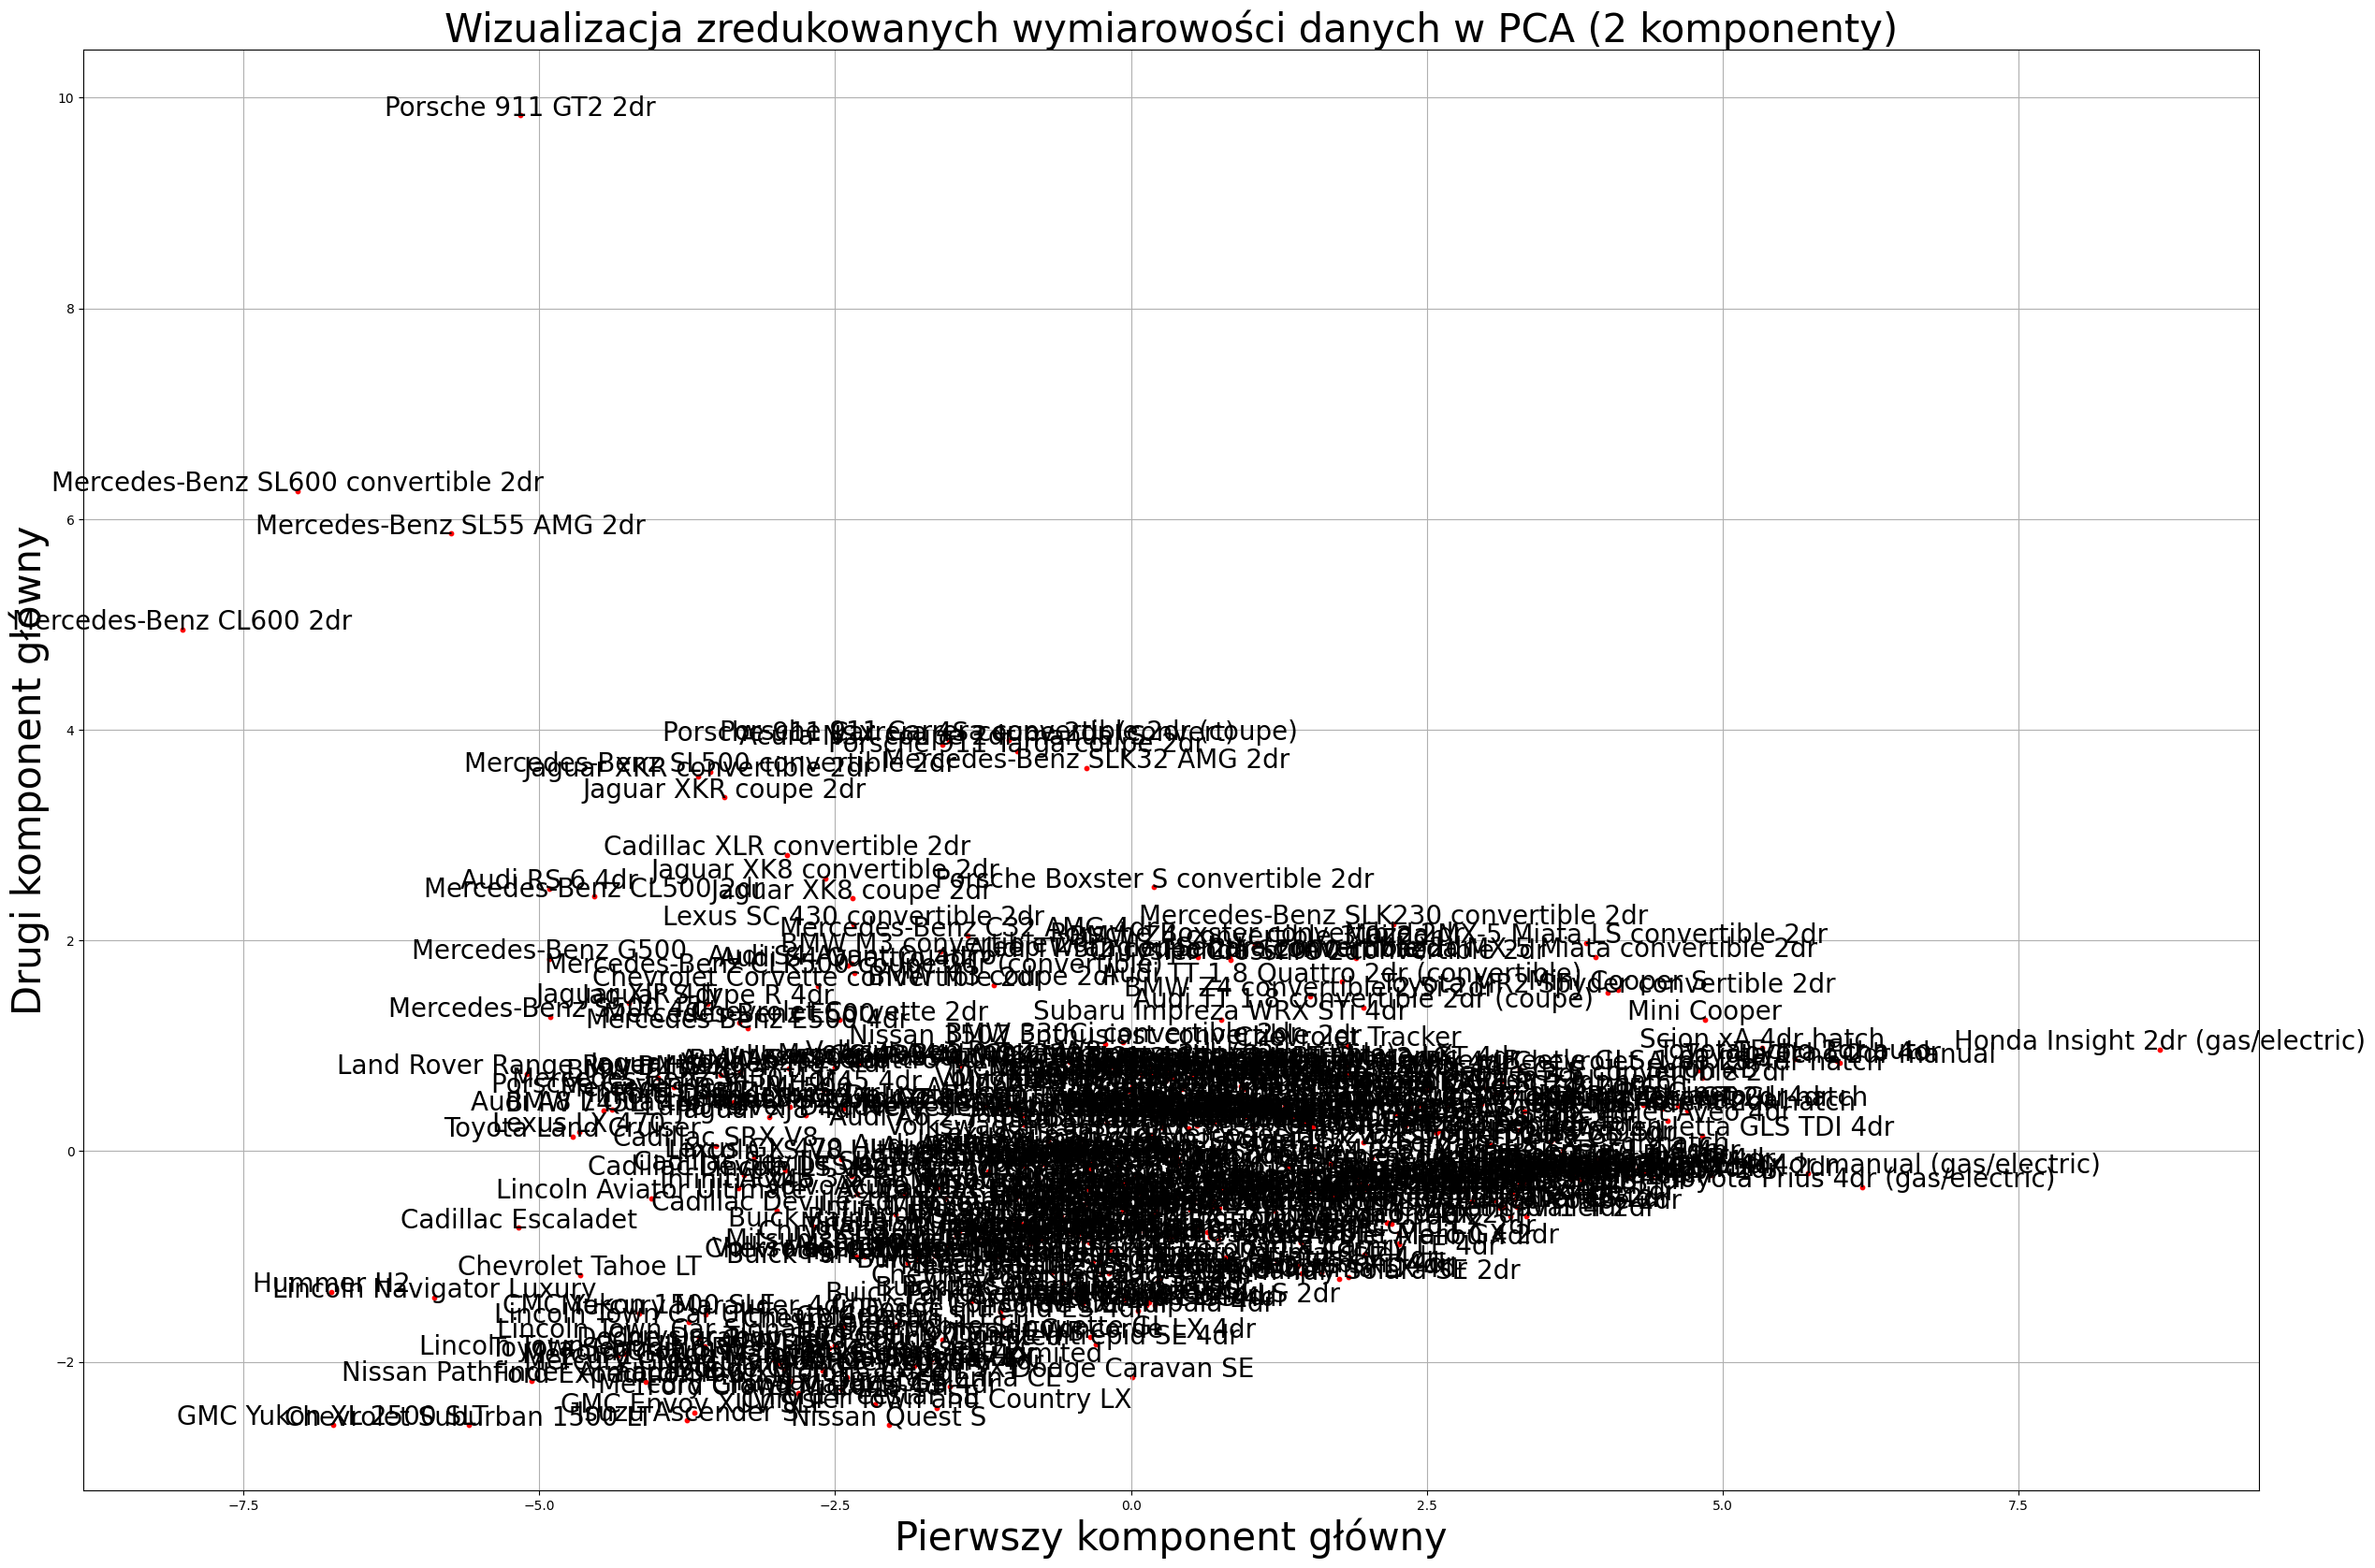

In [28]:
plt.figure(figsize=(30,20))
car_models = data_cars_full.iloc[:,0]

x = X_pca[:, 0]
y = X_pca[:, 1]
for i, name in enumerate(car_models):
    plt.annotate(name, (x[i], y[i]), ha='center', size=20)

plt.scatter(x, y, c="red", s=10)
plt.xlabel('Pierwszy komponent główny', fontsize = 30)
plt.ylabel('Drugi komponent główny', fontsize = 30)
plt.title('Wizualizacja zredukowanych wymiarowości danych w PCA (2 komponenty)', fontsize = 30)
plt.grid(True)
plt.show()

Na wizualizacji widać, że u góry są samochody drogie, na dole znaczenie ma gabaryt, a po prawej stronie są samochody ekonomiczne, miejskie.

<Figure size 3000x2000 with 0 Axes>

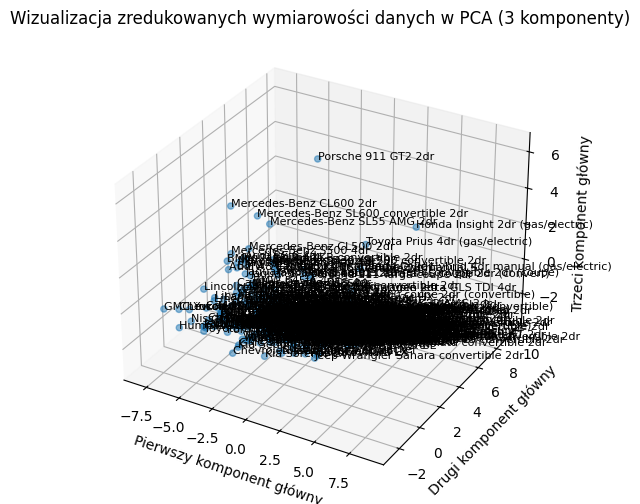

In [29]:
plt.figure(figsize=(30,20))
from mpl_toolkits.mplot3d import Axes3D

x = X_pca[:, 0]
y = X_pca[:, 1]
z = X_pca[:, 2]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, alpha=0.5)

# Dodanie tekstu z modelem samochodu
for i, model in enumerate(car_models):
    ax.text(x[i], y[i], z[i], model, fontsize=8)

ax.set_xlabel('Pierwszy komponent główny')
ax.set_ylabel('Drugi komponent główny')
ax.set_zlabel('Trzeci komponent główny')
ax.set_title('Wizualizacja zredukowanych wymiarowości danych w PCA (3 komponenty)')
plt.show()


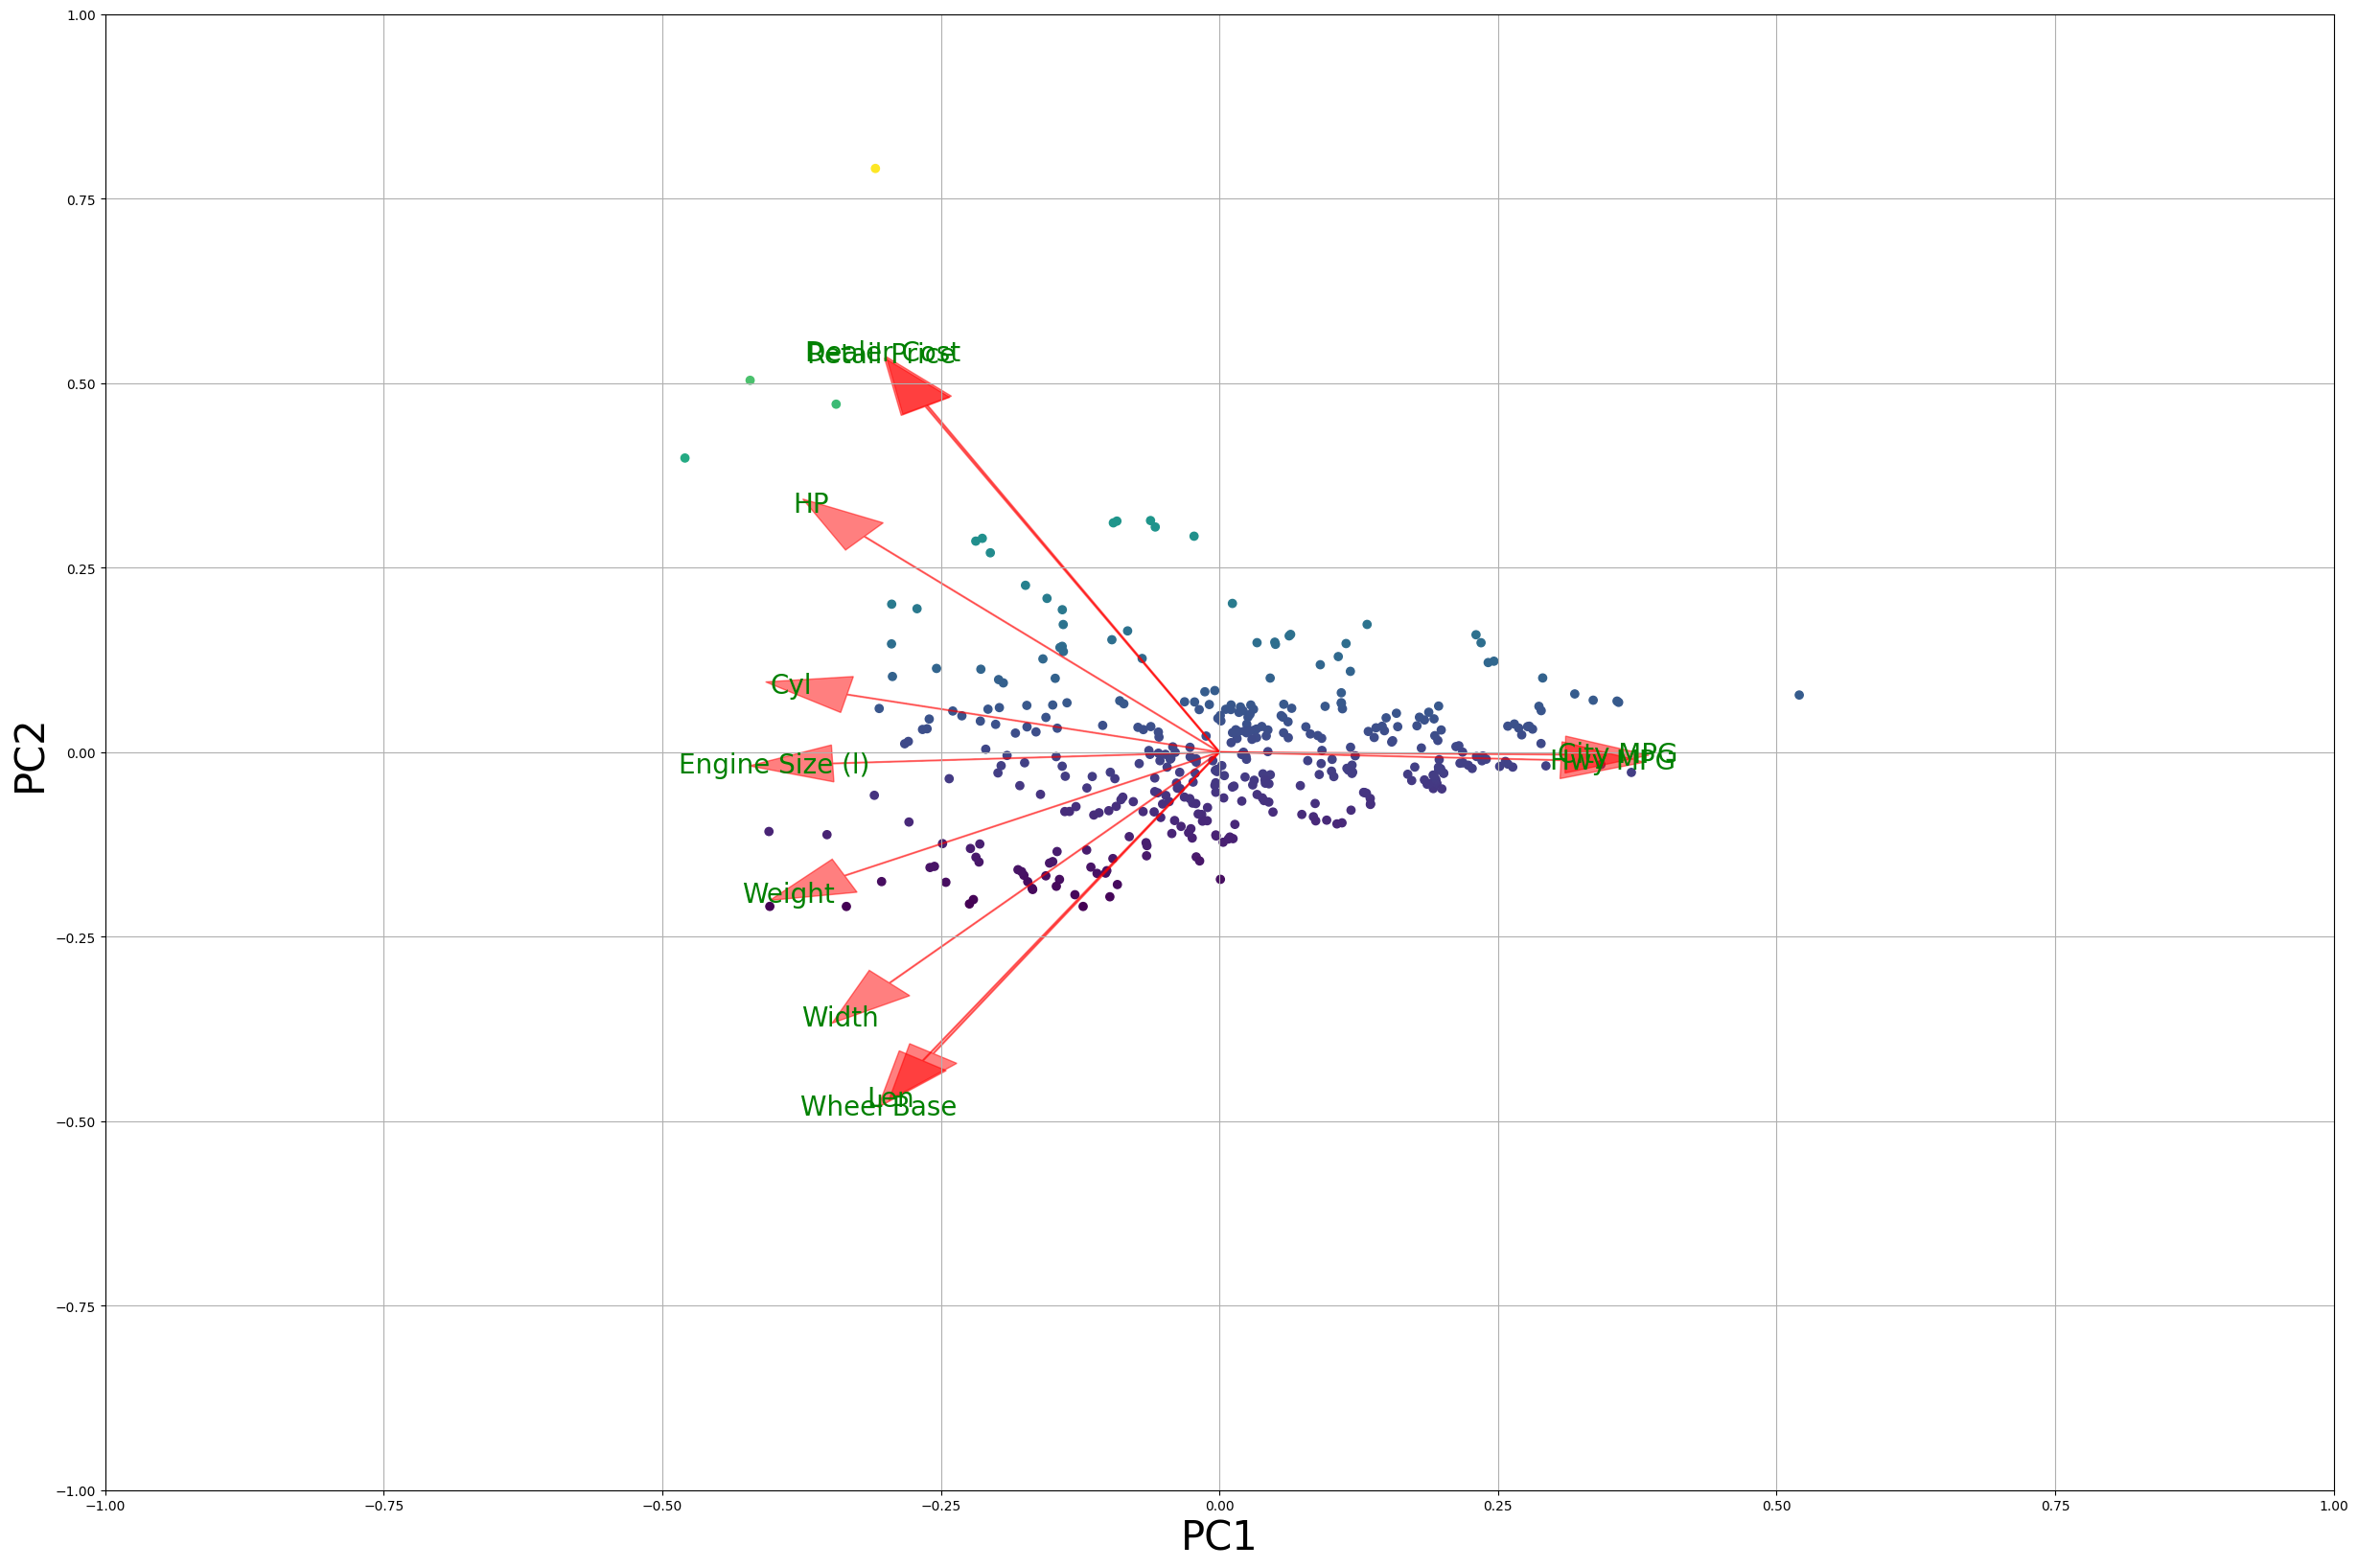

In [30]:
def biplot(score, coeff, labels=None):
    plt.figure(figsize=(30, 20))  

    x_score = score[:,0]
    y_score = score[:,1]
    scalex = 1.0/(x_score.max() - x_score.min())
    scaley = 1.0/(y_score.max() - y_score.min())
    plt.scatter(x_score * scalex, y_score * scaley, c = y)

    # Rysowanie wektorów cech
    for i in range(coeff.shape[0]):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5, head_width=0.05)
        if labels is not None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center', fontsize=20)

    # Ustawienia osi i etykiet
    plt.xlabel("PC1", fontsize=30)
    plt.ylabel("PC2", fontsize=30)

    # Ograniczenie zakresu osi
    plt.xlim(-1.0, 1.0)
    plt.ylim(-1.0, 1.0)
    
    plt.grid(True)
    plt.show()


biplot(X_pca[:, 0:2], pca.components_[0:2, :].T, attributes)


In [31]:
print(pca.components_[0:2, :])

[[-0.26375044 -0.26231864 -0.34708049 -0.33418876 -0.31860226  0.31048173
   0.30658864 -0.33632937 -0.26621003 -0.25679019 -0.29605459]
 [ 0.4685087   0.47014659 -0.01534719  0.07803201  0.29221348 -0.00336594
  -0.01096446 -0.16746357 -0.41817711 -0.40841138 -0.31289135]]


Analizując biplot, możemy zauważyć, które cechy mają podobne kierunki w przestrzeni PCA (wektory cech, które są blisko siebie), co może wskazywać na ich współzależność lub współzmienność.

# Budowa eigenfaces w oparciu o zbiór danych LFW

Zbiór danych Labeled Faces in the Wild (LFW) - benchmarkowy zbiór
danych do rozpoznawania twarzy składający się z ponad 13000 zdjęć rożnych osób

In [32]:
from sklearn.datasets import fetch_lfw_people

In [33]:
data_people = fetch_lfw_people(min_faces_per_person=50)

In [34]:
dir(data_people)

['DESCR', 'data', 'images', 'target', 'target_names']

In [35]:
data_people.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Jacques Chirac',
       'Jean Chretien', 'John Ashcroft', 'Junichiro Koizumi',
       'Serena Williams', 'Tony Blair'], dtype='<U17')

In [36]:
df_people = pd.DataFrame(data_people.data)

In [37]:
df_people.head()

,0,1,2,3,4,5,6,7,8,9,...,2904,2905,2906,2907,2908,2909,2910,2911,2912,2913
0,0.315033,0.332026,0.398693,0.467974,0.401307,0.337255,0.419608,0.496732,0.473203,0.498039,...,0.474510,0.448366,0.461438,0.432680,0.400000,0.362092,0.372549,0.525490,0.606536,0.465359
1,0.118954,0.223529,0.316340,0.335948,0.364706,0.386928,0.368627,0.351634,0.352941,0.339869,...,0.227451,0.230065,0.203922,0.236601,0.282353,0.270588,0.245752,0.303268,0.407843,0.520261
2,0.364706,0.254902,0.197386,0.249673,0.257516,0.273203,0.305882,0.312418,0.296732,0.292810,...,0.645752,0.662745,0.667974,0.687582,0.692810,0.708497,0.729412,0.518954,0.180392,0.312418
3,0.552941,0.563399,0.517647,0.401307,0.343791,0.389542,0.380392,0.405229,0.482353,0.475817,...,0.366013,0.383007,0.396078,0.410458,0.427451,0.448366,0.460131,0.437909,0.416993,0.456209
4,0.352941,0.355556,0.415686,0.322876,0.355556,0.526797,0.618301,0.650980,0.671895,0.700654,...,0.326797,0.339869,0.366013,0.469281,0.656209,0.810458,0.879739,0.913726,0.939869,0.941176


In [38]:
df_people['target'] = data_people.target

In [39]:
X = df_people.iloc[:, :-1].values
y = df_people.iloc[:, -1].values

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [41]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Podział na część treningową i testową (0.7, 0.3)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
X.std(axis=0)

array([0.99999905, 0.99999994, 1.0000005 , ..., 1.0000002 , 0.99999976,
       1.0000001 ], dtype=float32)

In [44]:
X.mean(axis=0)

array([ 4.5849728e-09,  6.1897132e-09, -4.5849728e-09, ...,
        1.4671913e-08,  1.1538848e-08, -5.7121117e-09], dtype=float32)

In [45]:
train_pca = PCA(n_components=100)
test_pca = PCA(n_components=100)

In [46]:
X_train_pca = train_pca.fit_transform(X_train)
X_test_pca = test_pca.fit_transform(X_test)

In [47]:
print(X_test_pca.shape)
print(X_train_pca.shape)

(468, 100)
(1092, 100)


In [48]:
print(y_train.shape)
print(y_test.shape)

(1092,)
(468,)


## PCA dla zbioru treningowego

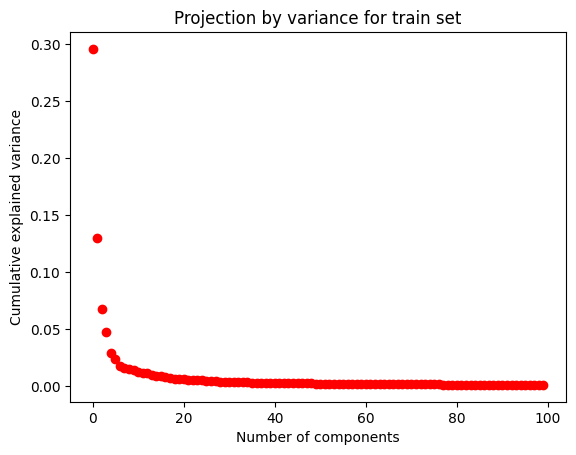

In [49]:
variance = train_pca.explained_variance_ratio_
plt.title("Projection by variance for train set")
plt.plot(variance, 'ro')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [50]:
print("Suma zachowanej wariancji dla 100 komponentów:",sum(variance))

Suma zachowanej wariancji dla 100 komponentów: 0.9097007132950239


In [51]:
explained_variance_first_2 = np.sum(variance[:2])
explained_variance_first_3 = np.sum(variance[:3])

print("Suma zachowanej wariancji dla pierwszych 2 komponentów:", explained_variance_first_2)
print("Suma zachowanej wariancji dla pierwszych 3 komponentów:", explained_variance_first_3)

Suma zachowanej wariancji dla pierwszych 2 komponentów: 0.42546827
Suma zachowanej wariancji dla pierwszych 3 komponentów: 0.49301717


## PCA dla zbioru testowego

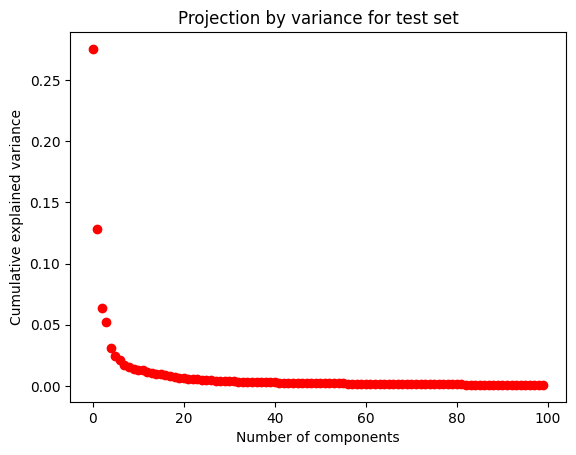

In [52]:
variance = test_pca.explained_variance_ratio_
plt.title("Projection by variance for test set")
plt.plot(variance, 'ro')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [53]:
print("Suma zachowanej wariancji dla 100 komponentów:",sum(variance))

Suma zachowanej wariancji dla 100 komponentów: 0.9225001204758883


In [54]:
explained_variance_first_2 = np.sum(variance[:2])
explained_variance_first_3 = np.sum(variance[:3])

print("Suma zachowanej wariancji dla pierwszych 2 komponentów:", explained_variance_first_2)
print("Suma zachowanej wariancji dla pierwszych 3 komponentów:", explained_variance_first_3)

Suma zachowanej wariancji dla pierwszych 2 komponentów: 0.40331817
Suma zachowanej wariancji dla pierwszych 3 komponentów: 0.4668063


In [55]:
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn import svm

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


## Trening modeli

### MLP

In [56]:
mlp = MLPClassifier(random_state=1, max_iter=300).fit(X_train_pca, y_train)

In [57]:
mlp_predictions = mlp.predict(X_test_pca)

In [58]:
accuracy_score(y_test, mlp_predictions)

0.19017094017094016

In [59]:
confusion_matrix(y_test, mlp_predictions)

array([[ 1,  4,  3,  4,  3,  0,  0,  0,  0,  2,  0,  4],
       [ 4, 11,  8, 38,  1,  0,  2,  2,  0,  4,  1,  6],
       [ 3,  6,  9,  6,  2,  1,  1,  1,  1,  0,  0,  2],
       [10, 21,  9, 65, 12,  5,  2,  8,  4,  0,  5, 21],
       [ 1,  8,  5,  8,  0,  1,  1,  1,  2,  1,  0,  2],
       [ 1,  1,  0, 15,  2,  0,  0,  0,  0,  0,  1,  1],
       [ 1,  6,  1,  1,  1,  0,  1,  1,  0,  1,  0,  4],
       [ 0,  3,  0,  8,  1,  0,  3,  0,  0,  0,  0,  2],
       [ 1,  3,  0, 13,  1,  1,  0,  0,  0,  0,  0,  0],
       [ 1,  3,  2,  3,  0,  0,  0,  1,  0,  0,  0,  3],
       [ 0,  2,  1,  7,  0,  0,  0,  0,  0,  1,  2,  0],
       [ 2, 11,  2, 18,  1,  1,  5,  2,  2,  1,  1,  0]], dtype=int64)

In [60]:
print(classification_report(y_test, mlp_predictions))

              precision    recall  f1-score   support

           0       0.04      0.05      0.04        21
           1       0.14      0.14      0.14        77
           2       0.23      0.28      0.25        32
           3       0.35      0.40      0.37       162
           4       0.00      0.00      0.00        30
           5       0.00      0.00      0.00        21
           6       0.07      0.06      0.06        17
           7       0.00      0.00      0.00        17
           8       0.00      0.00      0.00        19
           9       0.00      0.00      0.00        13
          10       0.20      0.15      0.17        13
          11       0.00      0.00      0.00        46

    accuracy                           0.19       468
   macro avg       0.09      0.09      0.09       468
weighted avg       0.17      0.19      0.18       468



### SVM

In [61]:
clf = svm.SVC()
clf.fit(X_train_pca, y_train)

SVC()

In [62]:
svm_predictions = clf.predict(X_test_pca)

In [63]:
accuracy_score(y_test, svm_predictions)

0.297008547008547

In [64]:
confusion_matrix(y_test, svm_predictions)

array([[  0,   6,   2,  11,   0,   0,   0,   0,   0,   0,   0,   2],
       [  1,  17,   2,  53,   0,   0,   0,   0,   0,   0,   0,   4],
       [  0,   5,   4,  21,   1,   0,   0,   0,   0,   0,   0,   1],
       [  1,  21,   6, 104,  10,   1,   0,   0,   0,   1,   3,  15],
       [  0,   7,   3,  14,   0,   0,   0,   0,   0,   0,   0,   6],
       [  0,   4,   0,  15,   1,   1,   0,   0,   0,   0,   0,   0],
       [  0,   6,   0,   6,   0,   0,   0,   0,   0,   0,   0,   5],
       [  0,   4,   1,  11,   0,   0,   0,   0,   0,   0,   0,   1],
       [  0,   2,   0,  14,   2,   0,   0,   0,   0,   0,   0,   1],
       [  0,   6,   0,   4,   1,   0,   0,   0,   0,   0,   0,   2],
       [  0,   0,   0,   3,   0,   0,   0,   0,   0,   0,  10,   0],
       [  0,   9,   1,  32,   0,   0,   0,   1,   0,   0,   0,   3]],
      dtype=int64)

In [65]:
print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.20      0.22      0.21        77
           2       0.21      0.12      0.16        32
           3       0.36      0.64      0.46       162
           4       0.00      0.00      0.00        30
           5       0.50      0.05      0.09        21
           6       0.00      0.00      0.00        17
           7       0.00      0.00      0.00        17
           8       0.00      0.00      0.00        19
           9       0.00      0.00      0.00        13
          10       0.77      0.77      0.77        13
          11       0.07      0.07      0.07        46

    accuracy                           0.30       468
   macro avg       0.18      0.16      0.15       468
weighted avg       0.22      0.30      0.24       468



C:\Users\pauli\anaconda3\envs\Sieci_neuronowe\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pauli\anaconda3\envs\Sieci_neuronowe\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pauli\anaconda3\envs\Sieci_neuronowe\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

## Redukcja do 50 wymiarów

In [66]:
train_pca_50 = PCA(n_components=50)
test_pca_50 = PCA(n_components=50)

X_train_pca_50 = train_pca_50.fit_transform(X_train)
X_test_pca_50 = test_pca_50.fit_transform(X_test)

### MLP

In [67]:
mlp = MLPClassifier(random_state=1, max_iter=300).fit(X_train_pca_50, y_train)

In [68]:
mlp_predictions = mlp.predict(X_test_pca_50)

In [69]:
accuracy_score(y_test, mlp_predictions)

0.22008547008547008

In [70]:
confusion_matrix(y_test, mlp_predictions)

array([[ 1,  5,  1,  3,  2,  0,  0,  1,  2,  1,  1,  4],
       [ 4, 10,  7, 37,  0,  1,  4,  1,  8,  2,  0,  3],
       [ 4,  1,  9,  8,  4,  0,  0,  2,  1,  0,  0,  3],
       [ 6, 20, 15, 70, 11,  6,  4, 11,  1,  1,  3, 14],
       [ 2,  8,  2, 10,  0,  0,  0,  3,  1,  0,  0,  4],
       [ 0,  3,  0, 11,  3,  2,  0,  0,  0,  1,  1,  0],
       [ 0,  6,  1,  1,  3,  0,  0,  0,  1,  1,  0,  4],
       [ 1,  1,  2,  7,  0,  1,  1,  2,  0,  0,  0,  2],
       [ 3,  1,  1,  8,  1,  2,  0,  1,  0,  0,  0,  2],
       [ 0,  2,  0,  1,  3,  5,  0,  2,  0,  0,  0,  0],
       [ 1,  1,  0,  5,  0,  0,  0,  0,  1,  1,  4,  0],
       [ 2,  8,  5, 15,  5,  1,  0,  2,  2,  0,  1,  5]], dtype=int64)

In [71]:
print(classification_report(y_test, mlp_predictions))

              precision    recall  f1-score   support

           0       0.04      0.05      0.04        21
           1       0.15      0.13      0.14        77
           2       0.21      0.28      0.24        32
           3       0.40      0.43      0.41       162
           4       0.00      0.00      0.00        30
           5       0.11      0.10      0.10        21
           6       0.00      0.00      0.00        17
           7       0.08      0.12      0.10        17
           8       0.00      0.00      0.00        19
           9       0.00      0.00      0.00        13
          10       0.40      0.31      0.35        13
          11       0.12      0.11      0.11        46

    accuracy                           0.22       468
   macro avg       0.13      0.13      0.12       468
weighted avg       0.21      0.22      0.21       468



### SVM


In [72]:
clf = svm.SVC()
clf.fit(X_train_pca_50, y_train)

SVC()

In [73]:
svm_predictions = clf.predict(X_test_pca_50)

In [74]:
accuracy_score(y_test, svm_predictions)

0.2799145299145299

In [75]:
confusion_matrix(y_test, svm_predictions)

array([[ 0,  5,  3, 11,  0,  0,  0,  0,  0,  0,  0,  2],
       [ 1, 19,  3, 51,  0,  0,  0,  0,  0,  0,  0,  3],
       [ 0,  6,  4, 20,  1,  0,  0,  0,  0,  0,  0,  1],
       [ 0, 25,  7, 95, 12,  2,  0,  0,  0,  1,  3, 17],
       [ 0,  7,  3, 15,  0,  0,  0,  0,  0,  0,  0,  5],
       [ 0,  4,  0, 15,  1,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  4,  0,  7,  0,  0,  0,  0,  0,  0,  0,  6],
       [ 0,  3,  1, 10,  0,  1,  0,  0,  0,  0,  0,  2],
       [ 0,  2,  0, 14,  2,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  4,  0,  5,  2,  0,  0,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  9,  0],
       [ 0, 10,  1, 31,  0,  0,  0,  1,  0,  0,  0,  3]], dtype=int64)

In [76]:
print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.21      0.25      0.23        77
           2       0.18      0.12      0.15        32
           3       0.34      0.59      0.43       162
           4       0.00      0.00      0.00        30
           5       0.25      0.05      0.08        21
           6       0.00      0.00      0.00        17
           7       0.00      0.00      0.00        17
           8       0.00      0.00      0.00        19
           9       0.00      0.00      0.00        13
          10       0.75      0.69      0.72        13
          11       0.07      0.07      0.07        46

    accuracy                           0.28       468
   macro avg       0.15      0.15      0.14       468
weighted avg       0.20      0.28      0.23       468



C:\Users\pauli\anaconda3\envs\Sieci_neuronowe\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pauli\anaconda3\envs\Sieci_neuronowe\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pauli\anaconda3\envs\Sieci_neuronowe\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

Redukcja wymiarowości pozwoliła osiągnąć nieco lepszą dokładność predykcji dla obu modeli.

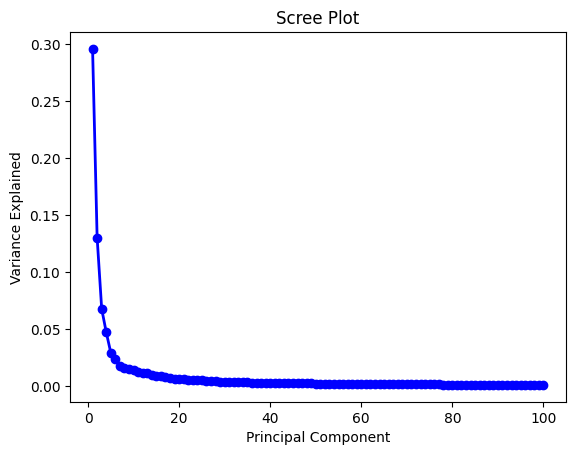

In [77]:
PC_values = np.arange(train_pca.n_components_) + 1
plt.plot(PC_values, train_pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

Wykres obrazuje "łokieć", który wskazuje, gdzie dodanie kolejnych komponentów lub czynników przynosi coraz mniejszy wzrost wyjaśnionej wariancji.
Oznacza to, że optymalna liczba wymiarów będzie odpowiadać ilości leżącej przed "łokciem".
Widzimy że jest on bardzo blsko 5. 



## Eigenfaces

In [78]:
pca_eigenfaces = PCA(n_components=20)
X_pca_eigenfaces = pca_eigenfaces.fit_transform(X)

In [79]:
def plot_gallery(images, titles, h, w, n_row=4, n_col=5):
    plt.figure(figsize=(2.5 * n_col, 2.5 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

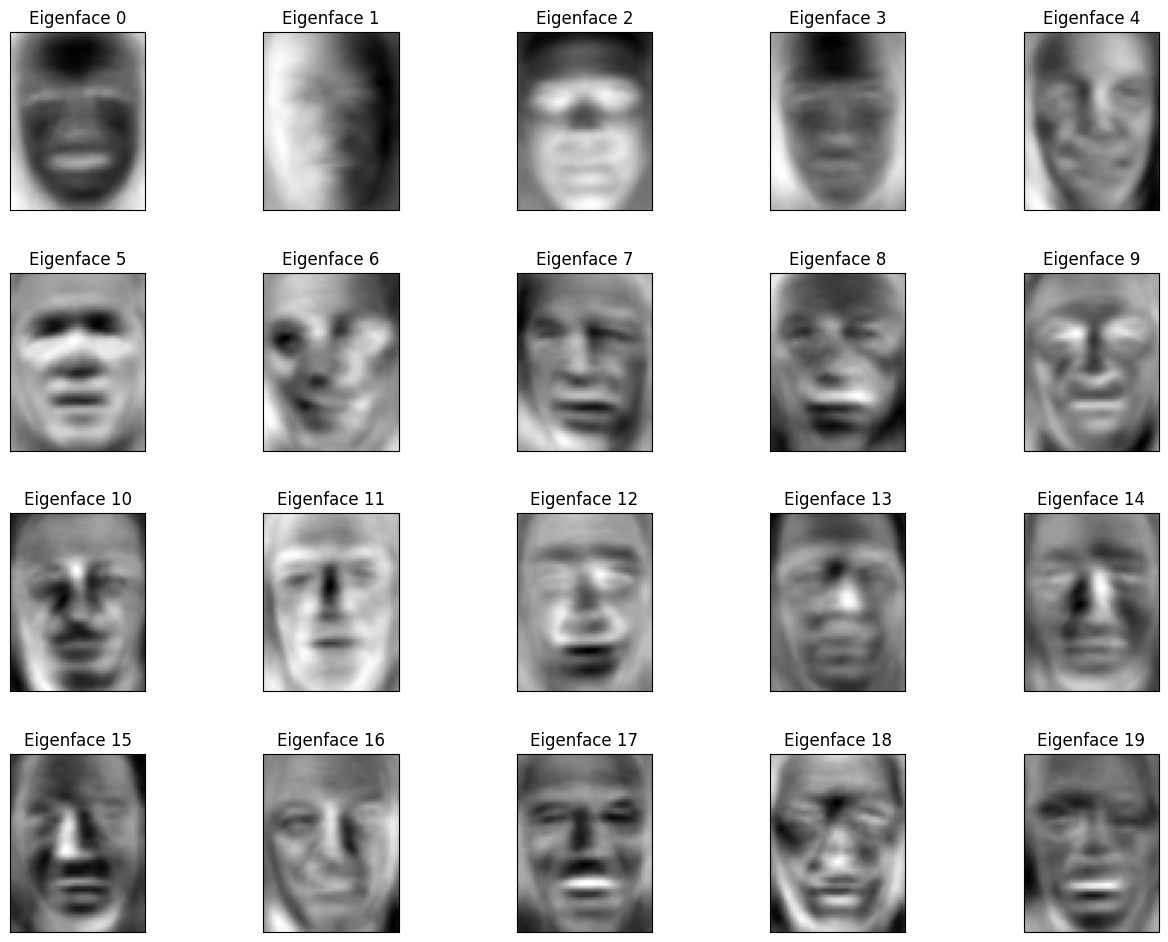

In [80]:
n_components = 20
_, h, w = data_people.images.shape
eigenfaces = pca_eigenfaces.components_.reshape((n_components, h, w))
eigenface_titles = ["Eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)



Eigenfaces ekstrahują różne cechy obrazów twarzy, które mają największy wpływ na zmienność w zbiorze danych Takie jak:
krawędzie twarzy, wzory oczu i ust ....